<a href="https://colab.research.google.com/github/cnddlf/2022_1_Study_AI/blob/main/K_%ED%8F%89%EA%B7%A0_%EC%95%8C%EA%B3%A0%EB%A6%AC%EC%A6%98(0307).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. 데이터 읽기

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
iris.data[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
import pandas as pd

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#2. 모델 만들기

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, random_state=62)
kmeans.fit(df_iris)
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
df_iris['target']=iris.target
df_iris['cluster']=kmeans.labels_
df_iris.groupby(['target', 'cluster'])['sepal length (cm)'].count()

target  cluster
0       1          50
1       0          48
        2           2
2       0          14
        2          36
Name: sepal length (cm), dtype: int64

#3. 데이터 가공

##3.1 표준화(StandardScaler)

In [ ]:
from sklearn.preprocessing import StandardScaler
iris_scaled = StandardScaler().fit_transform(iris.data)

##3.2 차원축소(PCA)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(iris_scaled)
pca_transformed[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [ ]:
df_iris['pca_x']=pca_transformed[:,0]
df_iris['pca_y']=pca_transformed[:,1]

#4. 시각화

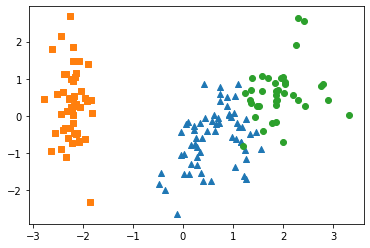

In [ ]:
import matplotlib.pyplot as plt

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  x = df_iris[df_iris['cluster']==i]['pca_x']
  y = df_iris[df_iris['cluster']==i]['pca_y']
  plt.scatter(x=x, y=y, marker=marker)

plt.show()

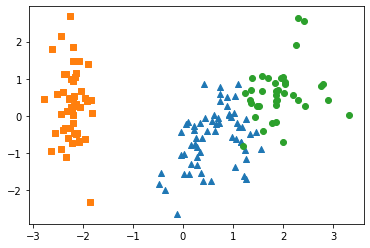

In [ ]:
import matplotlib.pyplot as plt

markers = ['^', 's', 'o']

for i, marker in enumerate(markers):
  marker_idx = df_iris[df_iris['cluster']==i].index
  plt.scatter(x=df_iris.loc[marker_idx, 'pca_x'], y=df_iris.loc[marker_idx, 'pca_y'], marker=marker)

plt.show()

In [ ]:
# 가상 데이터 만들기
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, n_features=2, centers=3, cluster_std=0.8, random_state=0)
X.shape

(200, 2)

In [ ]:
# labels 확인
import numpy as np

labels, cnts = np.unique(y, return_counts=True)
print(labels, cnts)

[0 1 2] [67 67 66]


In [ ]:
# dataframe 만들기
df_cluster = pd.DataFrame(data=X, columns=['f1', 'f2'])
df_cluster['labels'] = y
df_cluster.head()

,f1,f2,labels
0,-1.692427,3.622025,2
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,2
4,1.214861,5.364896,0


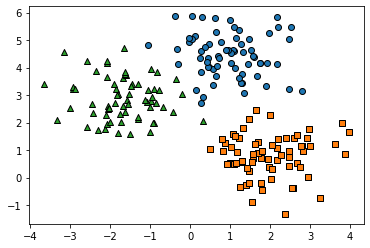

In [ ]:
# 시각화
markers = ['o', 's', '^']

for i, marker in enumerate(markers):
  x = df_cluster[df_cluster['labels']==i]['f1']
  y = df_cluster[df_cluster['labels']==i]['f2']
  plt.scatter(x=x, y=y, marker=marker, edgecolor='k')

plt.show()

In [ ]:
# kmeans 모델 생성 및 학습
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
kmeans.fit(X)

KMeans(max_iter=200, n_clusters=3, random_state=0)

In [ ]:
# label 확인
kmeans.labels_

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2], dtype=int32)

In [ ]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=200, random_state=0)
cluster_labels = kmeans.fit_predict(X)
cluster_labels

array([1, 0, 0, 1, 0, 1, 2, 2, 0, 1, 0, 1, 0, 0, 0, 1, 2, 2, 0, 1, 1, 2,
       0, 0, 1, 0, 2, 1, 1, 1, 0, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 1, 1, 2, 2, 0, 0, 1, 1, 0, 2, 2, 1,
       2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 2, 2, 0, 0, 1,
       0, 2, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 2, 0, 1, 2,
       0, 1, 2, 1, 0, 0, 0, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 1, 2,
       2, 2, 0, 2, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1,
       0, 2, 2, 2, 0, 0, 2, 1, 1, 1, 0, 0, 2, 1, 2, 2, 0, 2, 0, 2, 1, 1,
       0, 1, 0, 2, 0, 1, 2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 2, 2, 2, 2, 1, 2,
       0, 2], dtype=int32)

In [ ]:
df_cluster['kmeans_label'] = cluster_labels

In [ ]:
unique_labels = np.unique(cluster_labels)
unique_labels

array([0, 1, 2], dtype=int32)

In [ ]:
# 군집화의 중심점
centers = kmeans.cluster_centers_
centers

array([[ 0.990103  ,  4.44666506],
       [-1.70636483,  2.92759224],
       [ 1.95763312,  0.81041752]])

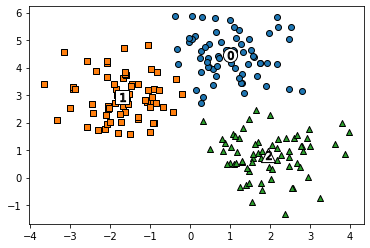

In [ ]:
# 시각화
for label in unique_labels:
  label_cluster = df_cluster[df_cluster['kmeans_label']==label]
  # print(label_cluster)
  plt.scatter(x=label_cluster['f1'], y=label_cluster['f2'], marker=markers[label], edgecolor='k')

  center_x_y = centers[label]
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white', marker=markers[label], edgecolor='k')
  plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='white', marker='$%d$' % label, edgecolor='k')

plt.show()